In [7]:
import tensorflow as tf
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

from mtcnn import MTCNN

Using TensorFlow backend.


In [8]:
m = MTCNN()

In [29]:
res = m.detect_faces(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
b = [face["box"] for face in res]

def extract_face(frame: np.ndarray,
                 bounding_box) -> np.ndarray:
    """Crops the frame given bounding box."""
    x, y, w, h = bounding_box
    cropped_frame = frame[y:y+h, x:x+w]
    return cropped_frame

def center_crop(img: np.ndarray,
                new_width: int,
                new_height: int) -> np.ndarray:        
    """Center crops the image to a new size."""
    width = img.shape[1]
    height = img.shape[0]

    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))

    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))

    if len(img.shape) == 2:
        center_cropped_img = img[top:bottom, left:right]
    else:
        center_cropped_img = img[top:bottom, left:right, ...]

    return center_cropped_img


In [17]:
n_img = extract_face(img, b[0])

In [3]:
img = cv2.imread("C:\\Users\\ppawlo\\Pictures\\Official_fotki\\MOBILE_1200\\DSC_8156.jpg")

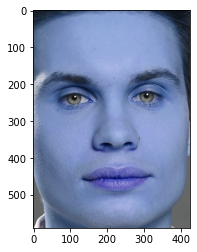

In [18]:
plt.imshow(n_img)
plt.show()

In [24]:
grays = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                    for img in images]

resized = [imutils.resize(img, width=48, height=48)
                        for img in grays]
        

In [27]:
# plt.imshow(resized[0])
resized[0].shape

(66, 48)

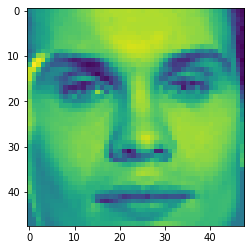

In [32]:
res = tf.stack([center_crop(img, 48, 48) 
                            for img in resized], axis=0)
plt.imshow(tf.squeeze(res))       

In [33]:
res.shape

TensorShape([1, 48, 48])

In [51]:
a = tf.image.resize_with_crop_or_pad(
    tf.expand_dims(resized[0], -1), 48, 48
)

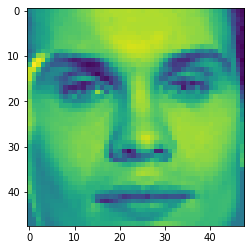

In [53]:
plt.imshow(tf.squeeze(a))

In [52]:
a.shape

TensorShape([48, 48, 1])